<a href="https://colab.research.google.com/github/Nazmul92/CMPT828-project/blob/main/course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn import manifold
import imageio
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Import dataset

In [2]:
df =pd.read_csv('/content/drive/MyDrive/HAM_data/HAM10000_metadata.csv')

In [3]:
target = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# HAM full dataset

In [ ]:
class_count = df['dx'].value_counts()

In [ ]:
class_count.values

array([6705, 1113, 1099,  514,  327,  142,  115])

In [ ]:
dx_to_int = {dx: i for i, dx in enumerate(df['dx'].unique())}

In [ ]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
df_labels = df['dx'].map(dx_to_int)

In [ ]:
size = (64, 64)
df_images = []
for i, row in df.iterrows():
    img = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img).resize(size))
    df_images.append(resized_img)

In [ ]:
np.array(df_images).shape

(10015, 64, 64, 3)

In [ ]:
df_images = np.array(df_images)
df_images = df_images.reshape(df_images.shape[0],-1)

In [ ]:
df_images.shape

(10015, 12288)

In [ ]:
tsne = manifold.TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_images)

# Subset of HAM10000 dataset

In [4]:
subset_metadata_a = df.sample(frac=0.2, random_state=42)   
subset_metadata_b = df.sample(frac=0.1, random_state=44)            ## subset(10%) of the dataset

In [ ]:
subset_metadata_a

,lesion_id,image_id,dx,dx_type,age,sex,localization
1617,HAM_0007180,ISIC_0033272,mel,histo,65.0,male,face
8128,HAM_0007195,ISIC_0031923,nv,histo,40.0,female,lower extremity
2168,HAM_0001835,ISIC_0026652,mel,histo,65.0,male,back
1090,HAM_0000465,ISIC_0030583,bkl,consensus,35.0,female,trunk
7754,HAM_0001720,ISIC_0034010,nv,histo,45.0,male,abdomen
...,...,...,...,...,...,...,...
1770,HAM_0000375,ISIC_0030238,mel,histo,45.0,male,back
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity
2020,HAM_0004979,ISIC_0032245,mel,histo,85.0,male,back
1642,HAM_0005711,ISIC_0033779,mel,histo,35.0,male,back


# Balancing the class of the subset

In [5]:
num_samples_per_label_a = 300                                                 ## 300 sample for each class
balanced_sub_a = pd.DataFrame()
for label in target:
    label_metadata_a = subset_metadata_a[subset_metadata_a['dx'] == label]
    label_samples_a = label_metadata_a.sample(n=num_samples_per_label_a, random_state=42, replace = True)
    balanced_sub_a = pd.concat([balanced_sub_a, label_samples_a])

In [42]:
balanced_sub_a

,lesion_id,image_id,dx,dx_type,age,sex,localization
2114,HAM_0005747,ISIC_0027105,mel,histo,45.0,male,lower extremity
2447,HAM_0006138,ISIC_0026713,vasc,consensus,35.0,female,hand
1741,HAM_0003073,ISIC_0033444,mel,histo,50.0,male,abdomen
2337,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck
9729,HAM_0007601,ISIC_0032437,akiec,histo,65.0,male,upper extremity
...,...,...,...,...,...,...,...
2870,HAM_0000655,ISIC_0028283,bcc,histo,70.0,female,neck
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face
29,HAM_0001480,ISIC_0031753,bkl,histo,70.0,male,abdomen
2447,HAM_0006138,ISIC_0026713,vasc,consensus,35.0,female,hand


In [6]:
num_samples_per_label_b = 150                                                ## 300 sample for each class
balanced_sub_b = pd.DataFrame()
for label in target:
    label_metadata_b = subset_metadata_b[subset_metadata_b['dx'] == label]
    label_samples_b = label_metadata_b.sample(n=num_samples_per_label_b, random_state=42, replace = True)
    balanced_sub_b = pd.concat([balanced_sub_b, label_samples_b])

In [32]:
sub_a_class_count = balanced_sub_a['dx'].value_counts()
sub_b_class_count = balanced_sub_b['dx'].value_counts()

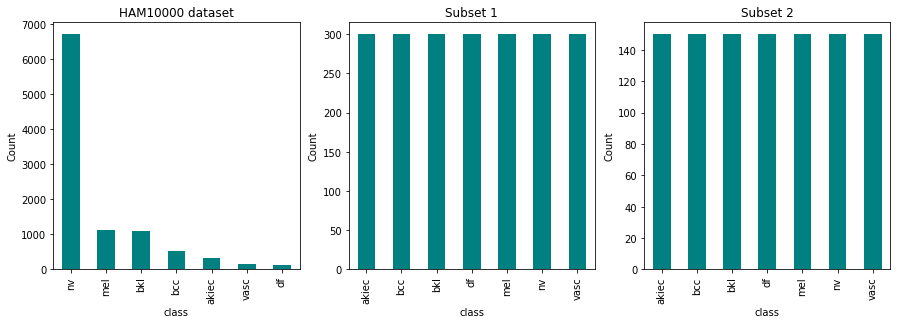

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
df['dx'].value_counts().plot(kind='bar', ax=ax1, color = 'teal')
ax1.set_ylabel('Count')
ax1.set_title('HAM10000 dataset')
ax1.set_xlabel('class')

ax2 = fig.add_subplot(232)
balanced_sub_a['dx'].value_counts().plot(kind='bar', ax=ax2, color = 'teal')
ax2.set_ylabel('Count')
ax2.set_title('Subset 1')
ax2.set_xlabel('class')

ax3 = fig.add_subplot(233)
balanced_sub_b['dx'].value_counts().plot(kind='bar', ax=ax3, color = 'teal')
ax3.set_ylabel('Count')
ax3.set_title('Subset 2');
ax3.set_xlabel('class')
plt.savefig('barplot-HAM10K.pdf', dpi=300, bbox_inches='tight')

In [33]:
dx_to_int_a = {dx: i for i, dx in enumerate(balanced_sub_a['dx'].unique())}
dx_to_int_b = {dx: i for i, dx in enumerate(balanced_sub_b['dx'].unique())}

In [35]:
dx_to_int_a

{'mel': 0, 'vasc': 1, 'akiec': 2, 'nv': 3, 'df': 4, 'bkl': 5, 'bcc': 6}

In [36]:
int_labels_a = balanced_sub_a['dx'].map(dx_to_int_a)
int_labels_b = balanced_sub_b['dx'].map(dx_to_int_b)

In [13]:
type(int_labels_a)

pandas.core.series.Series

In [ ]:
int_labels_b = balanced_sub_b['dx'].map(dx_to_int_b)

# Subset A

In [37]:
size = (64, 64)
images_sub_a = []
for i, row in balanced_sub_a.iterrows():
    img_a = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img_a).resize(size))
    images_sub_a.append(resized_img)

In [38]:
len(images_sub_a) 

2100

# Subset B

In [ ]:
size = (64, 64)
images_sub_b = []
for i, row in balanced_sub_b.iterrows():
    img_b = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img_b).resize(size))
    images_sub_b.append(resized_img)

In [ ]:
images_a = np.array(images_sub_a)
images_b = np.array(images_sub_b)

In [ ]:
images_a = images_a.reshape(images_a.shape[0], -1)
images_b = images_b.reshape(images_b.shape[0], -1)

In [ ]:
tsne = manifold.TSNE(n_components=3, random_state=42)

In [ ]:
model_tsne_a = tsne.fit_transform(images_a)

In [ ]:
model_tsne_b = tsne.fit_transform(images_b)

# t-SNE plot

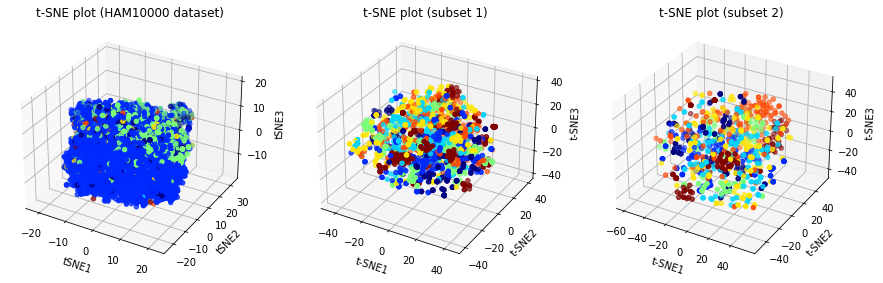

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(df_tsne[:,0], df_tsne[:,1], df_tsne[:,2], c=df_labels, cmap='jet')
ax1.set_xlabel('tSNE1')
ax1.set_ylabel('tSNE2')
ax1.set_zlabel('tSNE3')
ax1.set_title('t-SNE plot (HAM10000 dataset)')

ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(model_tsne_a[:,0], model_tsne_a[:,1], model_tsne_a[:,2], c=int_labels_a, cmap='jet')
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
ax2.set_zlabel('t-SNE3')
ax2.set_title('t-SNE plot (subset 1)')

ax2 = fig.add_subplot(233, projection='3d')
ax2.scatter(model_tsne_b[:,0], model_tsne_b[:,1], model_tsne_b[:,2], c=int_labels_b, cmap='jet')
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
ax2.set_zlabel('t-SNE3')
ax2.set_title('t-SNE plot (subset 2)')

plt.savefig('t-SNE-HAM10K.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Sample image plot

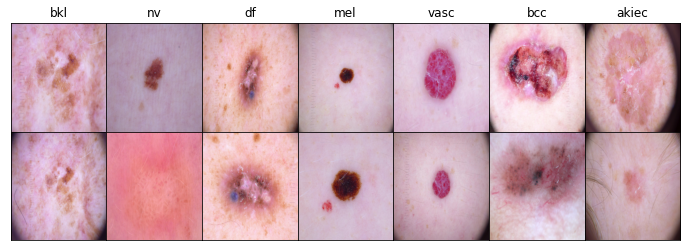

In [ ]:
fig = plt.figure(figsize=(12, 4))

class_files = {}
for class_name in df['dx'].unique():
    class_files[class_name] = df[df['dx'] == class_name]['image_id'].values


for i, (class_name, filenames) in enumerate(class_files.items()):
    img_path = '/content/drive/MyDrive/HAM_data/HAM10000/' + filenames[0] + '.jpg'
    img = plt.imread(img_path)
    ax = fig.add_subplot(2, len(class_files), i+1)
    ax.imshow(img, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_name)

    
    img_path = '/content/drive/MyDrive/HAM_data/HAM10000/' + filenames[1] + '.jpg'
    img = plt.imread(img_path)
    ax = fig.add_subplot(2, len(class_files), len(class_files) + i + 1)
    ax.imshow(img, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('sample-image.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Federated learning

In [ ]:
!pip install syft==0.2.9 -f https://download.pytorch.org/whl/torch_stable.html

In [15]:
import syft as sy
import torch

In [16]:
hook = sy.TorchHook(torch)

In [17]:
worker1 = sy.VirtualWorker(hook,id='worker1')
worker2 = sy.VirtualWorker(hook, id='worker2')
worker3 = sy.VirtualWorker(hook, id='worker3')
worker4 = sy.VirtualWorker(hook, id='worker4')

In [43]:
images_and_labels_sub_a = []
for i, row in balanced_sub_a.iterrows():
    img_b = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img_b).resize(size))
    label = row['dx']
    images_and_labels_sub_a.append((resized_img, label))

In [44]:
# Convert list of tuples to NumPy arrays
images_sub_a, labels_sub_a = zip(*images_and_labels_sub_a)
images_sub_a = np.array(images_sub_a)
labels_sub_a = np.array(labels_sub_a)

# Print the shapes of the resulting arrays
print('Image shape:', images_sub_a.shape)
print('Label shape:', labels_sub_a.shape)

Image shape: (2100, 64, 64, 3)
Label shape: (2100,)


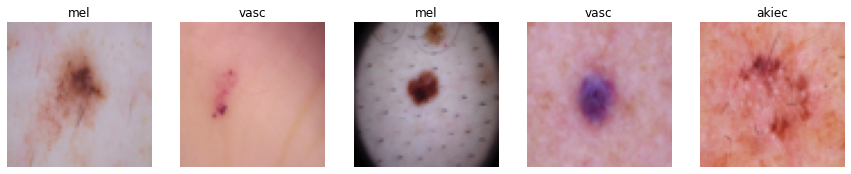

In [50]:
def display_images(images, labels):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(labels[i])
        ax.axis('off')
    plt.savefig('image_with_label.pdf', dpi=300, bbox_inches='tight')    
    plt.show()

display_images(images_sub_a, labels_sub_a)

In [60]:
from sklearn.preprocessing import LabelEncoder

tensor([4, 6, 4,  ..., 2, 6, 5])


In [56]:
image_x = torch.tensor(images_sub_a)

In [62]:
label_encoder = LabelEncoder()
numerical_labels_sub_a = label_encoder.fit_transform(labels_sub_a)
image_y = torch.tensor(numerical_labels_sub_a)

In [96]:
worker1.clear_objects()

<VirtualWorker id:worker1 #objects:0>

# Send image and label among virtual workers

In [97]:
worker1_data = image_x[0:525].send(worker1)
worker1_target = image_y[0:525].send(worker1)

In [ ]:
worker1._objects

In [100]:
worker2.clear_objects()

<VirtualWorker id:worker2 #objects:0>

In [101]:
worker2_data = image_x[525:1050].send(worker2)
worker2_target = image_y[525:1050].send(worker2)

In [103]:
worker3.clear_objects

<bound method BaseWorker.clear_objects of <VirtualWorker id:worker3 #objects:1>>

In [104]:
worker3_data = image_x[1050:1575].send(worker3)
worker3_target = image_y[1050:1575].send(worker3)

In [106]:
worker4.clear_objects()

<VirtualWorker id:worker4 #objects:0>

In [107]:
worker4_data = image_x[1575:2100].send(worker4)
worker4_target = image_y[1575:2100].send(worker4)

# Get image and label of each worker

In [99]:
worker1_image = worker1_data.get().numpy()
worker1_label = worker1_target.get().numpy()

In [102]:
worker2_image = worker2_data.get().numpy()
worker2_label = worker2_target.get().numpy()

In [105]:
worker3_image = worker3_data.get().numpy()
worker3_label = worker3_target.get().numpy()

In [108]:
worker4_image = worker4_data.get().numpy()
worker4_label = worker4_target.get().numpy()

In [110]:
tsne = manifold.TSNE(n_components=3, random_state=42)

In [116]:
worker1_image = worker1_image.reshape(worker1_image.shape[0], -1)
worker2_image = worker2_image.reshape(worker2_image.shape[0], -1)
worker3_image = worker3_image.reshape(worker3_image.shape[0], -1)
worker4_image = worker4_image.reshape(worker4_image.shape[0], -1)

In [117]:
tsne_worker1 = tsne.fit_transform(worker1_image)
tsne_worker2 = tsne.fit_transform(worker2_image)
tsne_worker3 = tsne.fit_transform(worker3_image)
tsne_worker4 = tsne.fit_transform(worker4_image)

# t_SNE plot of workers

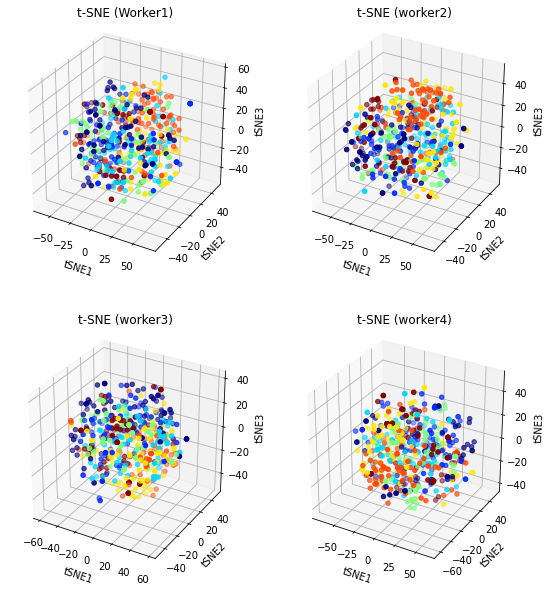

In [137]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(tsne_worker1[:,0], tsne_worker1[:,1], tsne_worker1[:,2], c=worker1_label, cmap='jet')
ax1.set_xlabel('tSNE1')
ax1.set_ylabel('tSNE2')
ax1.set_zlabel('tSNE3')
ax1.set_title('t-SNE (Worker1)')
ax1.set_box_aspect((1,1,1))

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(tsne_worker2[:,0], tsne_worker2[:,1], tsne_worker2[:,2], c=worker2_label, cmap='jet')
ax2.set_xlabel('tSNE1')
ax2.set_ylabel('tSNE2')
ax2.set_zlabel('tSNE3')
ax2.set_title('t-SNE (worker2)')
ax2.set_box_aspect((1,1,1))

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(tsne_worker3[:,0], tsne_worker3[:,1], tsne_worker3[:,2], c=worker3_label, cmap='jet')
ax3.set_xlabel('tSNE1')
ax3.set_ylabel('tSNE2')
ax3.set_zlabel('tSNE3')
ax3.set_title('t-SNE (worker3)')
ax3.set_box_aspect((1,1,1))

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(tsne_worker4[:,0], tsne_worker4[:,1], tsne_worker4[:,2], c=worker4_label, cmap='jet')
ax4.set_xlabel('tSNE1')
ax4.set_ylabel('tSNE2')
ax4.set_zlabel('tSNE3')
ax4.set_title('t-SNE (worker4)')
ax4.set_box_aspect((1,1,1))
fig.subplots_adjust(hspace=0.3, wspace=0)

plt.savefig('t-SNE-workers.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
worker1._objects

{}